#  Avila Bible Competition

## Importing libraries:

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

%matplotlib inline

## Analazing Data Set:

In [13]:
df = pd.read_csv("./training_dataset.csv", index_col=0)

dftest = pd.read_csv("./test_dataset.csv", index_col=0)
df.head()
#df.dtypes
#dftest.dtypes
#df.skew()
#dftest.skew()
#df.corr()
#dftest.corr()
# among other tests

,0,1,2,3,4,5,6,7,8,9,author
id,,,,,,,,,,,
0,0.142636,0.431070,0.032912,-0.486796,0.261718,-1.013906,-0.081827,0.330352,0.438262,-0.761088,Ubuntius
1,0.019197,0.525284,0.068476,0.166658,0.261718,0.231839,0.635431,0.133209,0.313536,-0.002374,Philippus
2,0.093260,-0.087108,-2.268081,-0.164963,0.261718,1.477585,0.635431,-0.370641,0.126447,1.078357,Marcus
3,-0.017834,-0.228430,0.370770,1.293671,0.172340,-0.058835,0.446679,1.609556,2.277968,-0.172339,Clarius
4,0.080916,-0.142067,0.171611,-0.470713,0.261718,-0.141884,-0.044076,0.375551,0.032902,0.009898,Philippus


## Seaborn matplotlib 

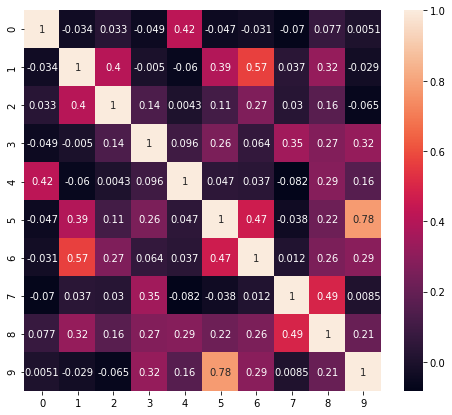

In [17]:
fig, ax_newCorr = plt.subplots(figsize=(8,7))  
ax_corr = sns.heatmap(df.corr(), annot = True)

## Selecting parameters to test for:

In [17]:
X = df[["0", "1", "2", "3", "4", "5", "6","7", "8", "9"]]
y = df[["author"]]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

## Importing different ML Models:

In [18]:
models = {
    "Linear": LinearSVC(max_iter=300),
    "neighbors": KNeighborsClassifier(),
    "histboosting": HistGradientBoostingClassifier(),
    "histboosting0.25": HistGradientBoostingClassifier(learning_rate=0.25),
    "histRegressor": HistGradientBoostingRegressor(),
    "histRegressor0.20": HistGradientBoostingRegressor(learning_rate=0.2)
    "forest300,50": RandomForestClassifier(n_estimators=300, max_depth=10),
    "Gradientboosting" : GradientBoostingClassifier(learning_rate=0.2)
}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=30)
    print(f"{name} accuracy => {np.mean(scores)}")

## Models results:

In [23]:
Linear accuracy => 0.5399008728179553
neighbors accuracy => 0.7565130922693266
histboosting accuracy => 0.9994168744804653
histboosting(0.2) accuracy => 0.9998333333333334
forest300,50 accuracy => 0.8773422693266834
Gradientboosting accuracy => 0.9414089775561099
Gradientboosting(0.2) accuracy => 0.9912626766417287

## Fitting best model to create training Data set:

In [31]:
df_hgbc = HistGradientBoostingClassifier(learning_rate=0.25)
df_train_hgbc = df_hgbc.fit(X_train, y_train)

/home/fabian/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Getting predictions Data Set and Checking shape to test with  Testing Data Set:

In [32]:
y_pred_hgbc = df_train_hgbc.predict(dftest)
y_pred_hgbc.shape

(8012,)

## Taking id column to add to prediction Data Set:

In [33]:
df = pd.read_csv("./test_dataset.csv")
df.shape

(8012, 11)

## Creating final Data Set Prediction:

In [35]:
Avila = pd.DataFrame({"id":df["id"],"author":y_pred_hgbc})
Avila

,id,author
0,0,Philippus
1,1,Philippus
2,2,Marcus
3,3,Marcus
4,4,Marcus
...,...,...
8007,8007,Philippus
8008,8008,Blanquius
8009,8009,Blanquius
8010,8010,Marcus


## Saving final prediction Data Set:

In [36]:
Avila.to_csv('author_Predict12.csv', index=False)